<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/notebooks/ipeps_energy_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Infinite PEPS simulations
In This simulation we find the ground state energy and tensor network representation of different infinite PEPS with periodic boundary conditions 

In [1]:
# If running from google colab change to TRUE
run_from_colab = False  # True if using google colab

### Cloning the latest tnsu repo from github
You can clone the latest `tnsu` repo from github or run 
```
!pip install tnsu
```

In [2]:
import sys
import os

if run_from_colab:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update

    # add path to .py files for import
    sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    # path for saving the networks
    save_path = '/content/gdrive/MyDrive/tmp'
else:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
    
    # add path to .py files for import
    sys.path.insert(1, "Tensor-Networks-Simple-Update/src")
    
    # path for saving the networks
    save_path = '../tmp/networks'
    
if not os.path.exists(save_path):
    os.makedirs(save_path)

fatal: destination path 'Tensor-Networks-Simple-Update' already exists and is not an empty directory.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tnsu.tensor_network import TensorNetwork
import tnsu.simple_update as su
from tqdm.auto import tqdm


np.random.seed(216)

plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

# Spin $\frac{1}{2}$ Lattice Simulations

In [11]:
# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

## Infinite Chain Tensor-Network Simple-Update Simulation

In [12]:
# The Tensor Network structure matrix
chain_structure_matrix = np.array([[1, 2],
                                   [1, 2]])

# Simple-Update parameters
d_max_chain = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]
error = 1e-5
max_iterations = 200
chain_energy = []
j_ij_chain = [1., 1.]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_chain:
    chain = TensorNetwork(structure_matrix=chain_structure_matrix, virtual_dim=d_max)
    chain_su = su.SimpleUpdate(tensor_network=chain, 
                               dts=dts, 
                               j_ij=j_ij_chain, 
                               h_k=h_k, 
                               s_i=s_i, 
                               s_j=s_j, 
                               s_k=s_k, 
                               d_max=d_max, 
                               max_iterations=max_iterations, 
                               convergence_error=error, 
                               log_energy=True,
                               print_process=True)
    chain_su.run()
    energy = chain_su.energy_per_site()
    print(f'| D max: {d_max} | Chain Energy: {energy}\n')
    chain_energy.append(energy)

| D max:  2 | dt: 0.100000 | iteration:     2/  200 | convergence error:  0.0306043007 | energy per-site:    0.11856618250 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     4/  200 | convergence error:  0.0273547935 | energy per-site:    0.01760813240 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     6/  200 | convergence error:  0.0335335611 | energy per-site:   -0.10015728530 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     8/  200 | convergence error:  0.0299880280 | energy per-site:   -0.20208308220 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    10/  200 | convergence error:  0.0225224216 | energy per-site:   -0.27411974950 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    12/  200 | convergence error:  0.0159664588 | energy per-site:   -0.32124744360 | itera

| D max:  2 | dt: 0.010000 | iteration:   128/  200 | convergence error:  0.0000534219 | energy per-site:   -0.42713536070 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:   130/  200 | convergence error:  0.0000526944 | energy per-site:   -0.42713649690 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:   132/  200 | convergence error:  0.0000519770 | energy per-site:   -0.42713760580 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:   134/  200 | convergence error:  0.0000512698 | energy per-site:   -0.42713868820 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:   136/  200 | convergence error:  0.0000505726 | energy per-site:   -0.42713974460 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:   138/  200 | convergence error:  0.0000498851 | energy per-site:   -0.42714077580 | itera

| D max:  3 | dt: 0.100000 | iteration:    26/  200 | convergence error:  0.0065464041 | energy per-site:   -0.33270430430 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    28/  200 | convergence error:  0.0058067238 | energy per-site:   -0.33879045900 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    30/  200 | convergence error:  0.0050436778 | energy per-site:   -0.34436850460 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    32/  200 | convergence error:  0.0042566255 | energy per-site:   -0.34944816700 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    34/  200 | convergence error:  0.0034687372 | energy per-site:   -0.35404126550 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    36/  200 | convergence error:  0.0027145293 | energy per-site:   -0.35817749880 | itera

| D max:  3 | dt: 0.100000 | iteration:   132/  200 | convergence error:  0.0000291247 | energy per-site:   -0.42818512310 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   134/  200 | convergence error:  0.0000244878 | energy per-site:   -0.42820950340 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   136/  200 | convergence error:  0.0000206279 | energy per-site:   -0.42823000870 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   138/  200 | convergence error:  0.0000174130 | energy per-site:   -0.42824725170 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   140/  200 | convergence error:  0.0000147336 | energy per-site:   -0.42826174900 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   142/  200 | convergence error:  0.0000124985 | energy per-site:   -0.42827393570 | itera

| D max:  3 | dt: 0.010000 | iteration:    92/  200 | convergence error:  0.0000735726 | energy per-site:   -0.43493331440 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    94/  200 | convergence error:  0.0000723774 | energy per-site:   -0.43493540230 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    96/  200 | convergence error:  0.0000712180 | energy per-site:   -0.43493743150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    98/  200 | convergence error:  0.0000700927 | energy per-site:   -0.43493940490 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:   100/  200 | convergence error:  0.0000690001 | energy per-site:   -0.43494132500 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:   102/  200 | convergence error:  0.0000679385 | energy per-site:   -0.43494319430 | itera

| D max:  3 | dt: 0.010000 | iteration:   198/  200 | convergence error:  0.0000371206 | energy per-site:   -0.43499823580 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.001000 | iteration:     2/  200 | convergence error:  0.0001209375 | energy per-site:   -0.43565599060 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.001000 | iteration:     4/  200 | convergence error:  0.0000049759 | energy per-site:   -0.43566430150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.000100 | iteration:     2/  200 | convergence error:  0.0000122469 | energy per-site:   -0.43573060150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.000100 | iteration:     4/  200 | convergence error:  0.0000005031 | energy per-site:   -0.43573144450 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.000010 | iteration:     2/  200 | convergence error:  0.0000012246 | energy per-site:   -0.43573807450 | itera

| D max:  4 | dt: 0.100000 | iteration:    88/  200 | convergence error:  0.0002343261 | energy per-site:   -0.43375241250 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    90/  200 | convergence error:  0.0002146094 | energy per-site:   -0.43375977490 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    92/  200 | convergence error:  0.0001966381 | energy per-site:   -0.43376634410 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    94/  200 | convergence error:  0.0001802483 | energy per-site:   -0.43377222100 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    96/  200 | convergence error:  0.0001652932 | energy per-site:   -0.43377749230 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    98/  200 | convergence error:  0.0001516406 | energy per-site:   -0.43378223280 | itera

| D max:  4 | dt: 0.010000 | iteration:    18/  200 | convergence error:  0.0001499578 | energy per-site:   -0.44007165380 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    20/  200 | convergence error:  0.0001451393 | energy per-site:   -0.44008358840 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    22/  200 | convergence error:  0.0001405082 | energy per-site:   -0.44009479860 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    24/  200 | convergence error:  0.0001364377 | energy per-site:   -0.44010532870 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    26/  200 | convergence error:  0.0001324844 | energy per-site:   -0.44011522050 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    28/  200 | convergence error:  0.0001286457 | energy per-site:   -0.44012451310 | itera

| D max:  4 | dt: 0.010000 | iteration:   122/  200 | convergence error:  0.0000357156 | energy per-site:   -0.44026420170 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:   124/  200 | convergence error:  0.0000349234 | energy per-site:   -0.44026480260 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:   126/  200 | convergence error:  0.0000341600 | energy per-site:   -0.44026537720 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:   128/  200 | convergence error:  0.0000334243 | energy per-site:   -0.44026592720 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:   130/  200 | convergence error:  0.0000327156 | energy per-site:   -0.44026645410 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:   132/  200 | convergence error:  0.0000320330 | energy per-site:   -0.44026695950 | itera

| D max:  5 | dt: 0.100000 | iteration:    12/  200 | convergence error:  0.0343150807 | energy per-site:   -0.19363746130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    14/  200 | convergence error:  0.0268912143 | energy per-site:   -0.28599923190 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    16/  200 | convergence error:  0.0184689720 | energy per-site:   -0.33580601200 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    18/  200 | convergence error:  0.0120837455 | energy per-site:   -0.36356977430 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    20/  200 | convergence error:  0.0093497607 | energy per-site:   -0.38055687780 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    22/  200 | convergence error:  0.0076171191 | energy per-site:   -0.39188838460 | itera

| D max:  5 | dt: 0.100000 | iteration:   114/  200 | convergence error:  0.0001368803 | energy per-site:   -0.43446506470 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:   116/  200 | convergence error:  0.0001268626 | energy per-site:   -0.43449329030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:   118/  200 | convergence error:  0.0001176696 | energy per-site:   -0.43451943080 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:   120/  200 | convergence error:  0.0001092386 | energy per-site:   -0.43454364350 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:   122/  200 | convergence error:  0.0001015118 | energy per-site:   -0.43456607250 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:   124/  200 | convergence error:  0.0000944352 | energy per-site:   -0.43458685000 | itera

| D max:  5 | dt: 0.010000 | iteration:    16/  200 | convergence error:  0.0001430736 | energy per-site:   -0.44103878790 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    18/  200 | convergence error:  0.0001382862 | energy per-site:   -0.44105084720 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    20/  200 | convergence error:  0.0001337221 | energy per-site:   -0.44106206730 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    22/  200 | convergence error:  0.0001293486 | energy per-site:   -0.44107252570 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    24/  200 | convergence error:  0.0001251513 | energy per-site:   -0.44108228450 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    26/  200 | convergence error:  0.0001211212 | energy per-site:   -0.44109139790 | itera

| D max:  5 | dt: 0.010000 | iteration:   118/  200 | convergence error:  0.0000360092 | energy per-site:   -0.44123392550 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:   120/  200 | convergence error:  0.0000352817 | energy per-site:   -0.44123486170 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:   122/  200 | convergence error:  0.0000345765 | energy per-site:   -0.44123576900 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:   124/  200 | convergence error:  0.0000338928 | energy per-site:   -0.44123664860 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:   126/  200 | convergence error:  0.0000332299 | energy per-site:   -0.44123750180 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:   128/  200 | convergence error:  0.0000325869 | energy per-site:   -0.44123832980 | itera

| D max:  6 | dt: 0.100000 | iteration:     4/  200 | convergence error:  0.0178735984 | energy per-site:    0.11072595700 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:     6/  200 | convergence error:  0.0244173575 | energy per-site:    0.00944601700 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:     8/  200 | convergence error:  0.0288440050 | energy per-site:   -0.10606584270 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    10/  200 | convergence error:  0.0307599305 | energy per-site:   -0.20618769930 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    12/  200 | convergence error:  0.0268420503 | energy per-site:   -0.27767223020 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    14/  200 | convergence error:  0.0214856493 | energy per-site:   -0.32429589320 | itera

| D max:  6 | dt: 0.100000 | iteration:   102/  200 | convergence error:  0.0004181159 | energy per-site:   -0.43441399030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:   104/  200 | convergence error:  0.0003950132 | energy per-site:   -0.43446132350 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:   106/  200 | convergence error:  0.0003732456 | energy per-site:   -0.43450551100 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:   108/  200 | convergence error:  0.0003527300 | energy per-site:   -0.43454680390 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:   110/  200 | convergence error:  0.0003333893 | energy per-site:   -0.43458542940 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:   112/  200 | convergence error:  0.0003151519 | energy per-site:   -0.43462159360 | itera

| D max:  6 | dt: 0.100000 | iteration:   198/  200 | convergence error:  0.0000332539 | energy per-site:   -0.43517653640 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:     2/  200 | convergence error:  0.0032970288 | energy per-site:   -0.44090304910 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:     4/  200 | convergence error:  0.0013201718 | energy per-site:   -0.44115383370 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:     6/  200 | convergence error:  0.0005566336 | energy per-site:   -0.44126492620 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:     8/  200 | convergence error:  0.0002657224 | energy per-site:   -0.44132193100 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:    10/  200 | convergence error:  0.0001777120 | energy per-site:   -0.44135567160 | itera

| D max:  6 | dt: 0.010000 | iteration:    98/  200 | convergence error:  0.0000461103 | energy per-site:   -0.44162124090 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   100/  200 | convergence error:  0.0000451707 | energy per-site:   -0.44162286070 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   102/  200 | convergence error:  0.0000442657 | energy per-site:   -0.44162442890 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   104/  200 | convergence error:  0.0000433936 | energy per-site:   -0.44162594820 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   106/  200 | convergence error:  0.0000425529 | energy per-site:   -0.44162742130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   108/  200 | convergence error:  0.0000417422 | energy per-site:   -0.44162885050 | itera

| D max:  6 | dt: 0.010000 | iteration:   196/  200 | convergence error:  0.0000224732 | energy per-site:   -0.44166779370 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.010000 | iteration:   198/  200 | convergence error:  0.0000222393 | energy per-site:   -0.44166837120 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.001000 | iteration:     2/  200 | convergence error:  0.0003173288 | energy per-site:   -0.44230961510 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.001000 | iteration:     4/  200 | convergence error:  0.0001260427 | energy per-site:   -0.44233317320 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.001000 | iteration:     6/  200 | convergence error:  0.0000521193 | energy per-site:   -0.44234243830 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.001000 | iteration:     8/  200 | convergence error:  0.0000214242 | energy per-site:   -0.44234636810 | itera

| D max:  7 | dt: 0.100000 | iteration:   168/  200 | convergence error:  0.0000985659 | energy per-site:   -0.43551761890 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:   170/  200 | convergence error:  0.0000945218 | energy per-site:   -0.43552930520 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:   172/  200 | convergence error:  0.0000906799 | energy per-site:   -0.43554050580 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:   174/  200 | convergence error:  0.0000870302 | energy per-site:   -0.43555124440 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:   176/  200 | convergence error:  0.0000835633 | energy per-site:   -0.43556154310 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:   178/  200 | convergence error:  0.0000802700 | energy per-site:   -0.43557142290 | itera

| D max:  7 | dt: 0.010000 | iteration:   160/  200 | convergence error:  0.0000276287 | energy per-site:   -0.44178248150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.010000 | iteration:   162/  200 | convergence error:  0.0000273320 | energy per-site:   -0.44178349300 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.010000 | iteration:   164/  200 | convergence error:  0.0000270426 | energy per-site:   -0.44178449030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.010000 | iteration:   166/  200 | convergence error:  0.0000267600 | energy per-site:   -0.44178547380 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.010000 | iteration:   168/  200 | convergence error:  0.0000264841 | energy per-site:   -0.44178644400 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  7 | dt: 0.010000 | iteration:   170/  200 | convergence error:  0.0000262146 | energy per-site:   -0.44178740130 | itera

| D max:  8 | dt: 0.100000 | iteration:   124/  200 | convergence error:  0.0004936477 | energy per-site:   -0.43234651430 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.100000 | iteration:   126/  200 | convergence error:  0.0004737191 | energy per-site:   -0.43241853060 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.100000 | iteration:   128/  200 | convergence error:  0.0004544141 | energy per-site:   -0.43248770130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.100000 | iteration:   130/  200 | convergence error:  0.0004357096 | energy per-site:   -0.43255418340 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.100000 | iteration:   132/  200 | convergence error:  0.0004175848 | energy per-site:   -0.43261812280 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.100000 | iteration:   134/  200 | convergence error:  0.0004000216 | energy per-site:   -0.43267965530 | itera

| D max:  8 | dt: 0.010000 | iteration:   112/  200 | convergence error:  0.0000422756 | energy per-site:   -0.44037814360 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.010000 | iteration:   114/  200 | convergence error:  0.0000415830 | energy per-site:   -0.44038240720 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.010000 | iteration:   116/  200 | convergence error:  0.0000409145 | energy per-site:   -0.44038663030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.010000 | iteration:   118/  200 | convergence error:  0.0000402690 | energy per-site:   -0.44039081450 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.010000 | iteration:   120/  200 | convergence error:  0.0000396457 | energy per-site:   -0.44039496170 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  8 | dt: 0.010000 | iteration:   122/  200 | convergence error:  0.0000390438 | energy per-site:   -0.44039907330 | itera

| D max:  9 | dt: 0.100000 | iteration:    68/  200 | convergence error:  0.0016436431 | energy per-site:   -0.42487875970 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.100000 | iteration:    70/  200 | convergence error:  0.0015776658 | energy per-site:   -0.42552749730 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.100000 | iteration:    72/  200 | convergence error:  0.0015150519 | energy per-site:   -0.42612223660 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.100000 | iteration:    74/  200 | convergence error:  0.0014555527 | energy per-site:   -0.42666873930 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.100000 | iteration:    76/  200 | convergence error:  0.0013989469 | energy per-site:   -0.42717203230 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.100000 | iteration:    78/  200 | convergence error:  0.0013450359 | energy per-site:   -0.42763651570 | itera

| D max:  9 | dt: 0.010000 | iteration:    46/  200 | convergence error:  0.0000895876 | energy per-site:   -0.44087527870 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.010000 | iteration:    48/  200 | convergence error:  0.0000867615 | energy per-site:   -0.44088322230 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.010000 | iteration:    50/  200 | convergence error:  0.0000840304 | energy per-site:   -0.44089087380 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.010000 | iteration:    52/  200 | convergence error:  0.0000814107 | energy per-site:   -0.44089825680 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.010000 | iteration:    54/  200 | convergence error:  0.0000789090 | energy per-site:   -0.44090539100 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.010000 | iteration:    56/  200 | convergence error:  0.0000765246 | energy per-site:   -0.44091229310 | itera

| D max:  9 | dt: 0.000100 | iteration:     4/  200 | convergence error:  0.0000107889 | energy per-site:   -0.44186151300 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.000100 | iteration:     6/  200 | convergence error:  0.0000043147 | energy per-site:   -0.44186216430 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  9 | dt: 0.000010 | iteration:     2/  200 | convergence error:  0.0000018984 | energy per-site:   -0.44186834850 | iteration time:   0.0 sec | tot time:    0.0 min
==> Simple Update converged. final error is 0.0000018984 < 0.0000100000.
| D max: 9 | Chain Energy: -0.44186834845941114

| D max: 10 | dt: 0.100000 | iteration:     2/  200 | convergence error:  0.0164604635 | energy per-site:    0.23750996360 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:     4/  200 | convergence error:  0.0045580594 | energy per-site:    0.22263118690 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:

| D max: 10 | dt: 0.100000 | iteration:   166/  200 | convergence error:  0.0003516500 | energy per-site:   -0.43559042140 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:   168/  200 | convergence error:  0.0003420263 | energy per-site:   -0.43559866810 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:   170/  200 | convergence error:  0.0003326986 | energy per-site:   -0.43560656150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:   172/  200 | convergence error:  0.0003236557 | energy per-site:   -0.43561411990 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:   174/  200 | convergence error:  0.0003148870 | energy per-site:   -0.43562136070 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.100000 | iteration:   176/  200 | convergence error:  0.0003063827 | energy per-site:   -0.43562830030 | itera

| D max: 10 | dt: 0.010000 | iteration:   138/  200 | convergence error:  0.0000431905 | energy per-site:   -0.44206220130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.010000 | iteration:   140/  200 | convergence error:  0.0000426730 | energy per-site:   -0.44206336140 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.010000 | iteration:   142/  200 | convergence error:  0.0000421696 | energy per-site:   -0.44206450110 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.010000 | iteration:   144/  200 | convergence error:  0.0000416796 | energy per-site:   -0.44206562110 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.010000 | iteration:   146/  200 | convergence error:  0.0000412027 | energy per-site:   -0.44206672210 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 10 | dt: 0.010000 | iteration:   148/  200 | convergence error:  0.0000407382 | energy per-site:   -0.44206780500 | itera

| D max: 20 | dt: 0.100000 | iteration:    48/  200 | convergence error:  0.0044521934 | energy per-site:   -0.40258716350 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:    50/  200 | convergence error:  0.0043774540 | energy per-site:   -0.40426775180 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:    52/  200 | convergence error:  0.0043399838 | energy per-site:   -0.40575911820 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:    54/  200 | convergence error:  0.0043355494 | energy per-site:   -0.40708884110 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:    56/  200 | convergence error:  0.0043633226 | energy per-site:   -0.40827978130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:    58/  200 | convergence error:  0.0044236123 | energy per-site:   -0.40935117930 | itera

| D max: 20 | dt: 0.100000 | iteration:   180/  200 | convergence error:  0.0004415337 | energy per-site:   -0.43530613630 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:   182/  200 | convergence error:  0.0004273450 | energy per-site:   -0.43532655900 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:   184/  200 | convergence error:  0.0004137729 | energy per-site:   -0.43534590090 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:   186/  200 | convergence error:  0.0004007772 | energy per-site:   -0.43536423540 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:   188/  200 | convergence error:  0.0003883219 | energy per-site:   -0.43538162960 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.100000 | iteration:   190/  200 | convergence error:  0.0003763737 | energy per-site:   -0.43539814500 | itera

| D max: 20 | dt: 0.010000 | iteration:   112/  200 | convergence error:  0.0000495964 | energy per-site:   -0.44185519150 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.010000 | iteration:   114/  200 | convergence error:  0.0000489757 | energy per-site:   -0.44185747640 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.010000 | iteration:   116/  200 | convergence error:  0.0000483738 | energy per-site:   -0.44185972110 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.010000 | iteration:   118/  200 | convergence error:  0.0000477903 | energy per-site:   -0.44186192730 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.010000 | iteration:   120/  200 | convergence error:  0.0000472236 | energy per-site:   -0.44186409680 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 20 | dt: 0.010000 | iteration:   122/  200 | convergence error:  0.0000466742 | energy per-site:   -0.44186623090 | itera

| D max: 30 | dt: 0.100000 | iteration:    14/  200 | convergence error:  0.0307717915 | energy per-site:    0.04190258870 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:    16/  200 | convergence error:  0.0310670926 | energy per-site:   -0.04541792120 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:    18/  200 | convergence error:  0.0272660198 | energy per-site:   -0.12121378740 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:    20/  200 | convergence error:  0.0223648712 | energy per-site:   -0.17997150370 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:    22/  200 | convergence error:  0.0187916298 | energy per-site:   -0.22395156960 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:    24/  200 | convergence error:  0.0168150005 | energy per-site:   -0.25688572650 | itera

| D max: 30 | dt: 0.100000 | iteration:   124/  200 | convergence error:  0.0005631595 | energy per-site:   -0.43414705970 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:   126/  200 | convergence error:  0.0005486339 | energy per-site:   -0.43421155950 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:   128/  200 | convergence error:  0.0005361505 | energy per-site:   -0.43427273600 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:   130/  200 | convergence error:  0.0005236368 | energy per-site:   -0.43433082920 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:   132/  200 | convergence error:  0.0005121134 | energy per-site:   -0.43438604730 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.100000 | iteration:   134/  200 | convergence error:  0.0004998013 | energy per-site:   -0.43443856400 | itera

| D max: 30 | dt: 0.010000 | iteration:    34/  200 | convergence error:  0.0000950409 | energy per-site:   -0.44150137440 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:    36/  200 | convergence error:  0.0000921237 | energy per-site:   -0.44151023620 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:    38/  200 | convergence error:  0.0000894683 | energy per-site:   -0.44151879430 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:    40/  200 | convergence error:  0.0000870628 | energy per-site:   -0.44152698940 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:    42/  200 | convergence error:  0.0000848330 | energy per-site:   -0.44153479290 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:    44/  200 | convergence error:  0.0000827926 | energy per-site:   -0.44154220030 | itera

| D max: 30 | dt: 0.010000 | iteration:   144/  200 | convergence error:  0.0000375138 | energy per-site:   -0.44171597330 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:   146/  200 | convergence error:  0.0000371766 | energy per-site:   -0.44171801770 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:   148/  200 | convergence error:  0.0000368436 | energy per-site:   -0.44172004080 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:   150/  200 | convergence error:  0.0000365223 | energy per-site:   -0.44172204310 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:   152/  200 | convergence error:  0.0000362082 | energy per-site:   -0.44172402540 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 30 | dt: 0.010000 | iteration:   154/  200 | convergence error:  0.0000359031 | energy per-site:   -0.44172598820 | itera

| D max: 40 | dt: 0.100000 | iteration:    28/  200 | convergence error:  0.0100568193 | energy per-site:   -0.37571350360 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 40 | dt: 0.100000 | iteration:    30/  200 | convergence error:  0.0083826292 | energy per-site:   -0.38616857060 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 40 | dt: 0.100000 | iteration:    32/  200 | convergence error:  0.0071613140 | energy per-site:   -0.39399598460 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 40 | dt: 0.100000 | iteration:    34/  200 | convergence error:  0.0062289854 | energy per-site:   -0.40004323030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 40 | dt: 0.100000 | iteration:    36/  200 | convergence error:  0.0055007791 | energy per-site:   -0.40483160980 | iteration time:   0.0 sec | tot time:    0.0 min
| D max: 40 | dt: 0.100000 | iteration:    38/  200 | convergence error:  0.0049189239 | energy per-site:   -0.40869895240 | itera

| D max: 40 | dt: 0.100000 | iteration:   124/  200 | convergence error:  0.0008054238 | energy per-site:   -0.43404434040 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.100000 | iteration:   126/  200 | convergence error:  0.0007890144 | energy per-site:   -0.43411058720 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.100000 | iteration:   128/  200 | convergence error:  0.0007732267 | energy per-site:   -0.43417359400 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.100000 | iteration:   130/  200 | convergence error:  0.0007580241 | energy per-site:   -0.43423356760 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.100000 | iteration:   132/  200 | convergence error:  0.0007433727 | energy per-site:   -0.43429069840 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.100000 | iteration:   134/  200 | convergence error:  0.0007292416 | energy per-site:   -0.43434516240 | itera

| D max: 40 | dt: 0.010000 | iteration:    28/  200 | convergence error:  0.0001535019 | energy per-site:   -0.44127965470 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:    30/  200 | convergence error:  0.0001496998 | energy per-site:   -0.44128953210 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:    32/  200 | convergence error:  0.0001450499 | energy per-site:   -0.44129999670 | iteration time:   0.1 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:    34/  200 | convergence error:  0.0001394475 | energy per-site:   -0.44131060980 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:    36/  200 | convergence error:  0.0001339118 | energy per-site:   -0.44132101370 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:    38/  200 | convergence error:  0.0001292933 | energy per-site:   -0.44133095510 | itera

| D max: 40 | dt: 0.010000 | iteration:   124/  200 | convergence error:  0.0000634974 | energy per-site:   -0.44151731670 | iteration time:   0.1 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:   126/  200 | convergence error:  0.0000628914 | energy per-site:   -0.44151984090 | iteration time:   0.1 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:   128/  200 | convergence error:  0.0000623045 | energy per-site:   -0.44152233360 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:   130/  200 | convergence error:  0.0000617359 | energy per-site:   -0.44152479620 | iteration time:   0.0 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:   132/  200 | convergence error:  0.0000611848 | energy per-site:   -0.44152722970 | iteration time:   0.1 sec | tot time:    0.1 min
| D max: 40 | dt: 0.010000 | iteration:   134/  200 | convergence error:  0.0000606505 | energy per-site:   -0.44152963520 | itera

| D max: 40 | dt: 0.000100 | iteration:     2/  200 | convergence error:  0.0000269567 | energy per-site:   -0.44229202900 | iteration time:   0.1 sec | tot time:    0.2 min
| D max: 40 | dt: 0.000100 | iteration:     4/  200 | convergence error:  0.0000150885 | energy per-site:   -0.44229372860 | iteration time:   0.0 sec | tot time:    0.2 min
| D max: 40 | dt: 0.000100 | iteration:     6/  200 | convergence error:  0.0000096038 | energy per-site:   -0.44229445850 | iteration time:   0.0 sec | tot time:    0.2 min
| D max: 40 | dt: 0.000010 | iteration:     2/  200 | convergence error:  0.0000067620 | energy per-site:   -0.44230107910 | iteration time:   0.1 sec | tot time:    0.2 min
==> Simple Update converged. final error is 0.0000067620 < 0.0000100000.
| D max: 40 | Chain Energy: -0.4423010790508899



## Infinite PEPS Tensor-Network Simple-Update Simulation

In [13]:
# The Tensor Network structure matrix
peps_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_peps = [2, 3, 4]
error = 1e-5
max_iterations = 200
peps_energy = []
j_ij_peps = [1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_peps:
    peps = TensorNetwork(structure_matrix=peps_structure_matrix, virtual_dim=d_max)
    peps_su = su.SimpleUpdate(tensor_network=peps, 
                              dts=dts, 
                              j_ij=j_ij_peps, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    peps_su.run()
    energy = peps_su.energy_per_site()
    print(f'| D max: {d_max} | PEPS Energy: {energy}\n')
    peps_energy.append(energy)

| D max:  2 | dt: 0.100000 | iteration:     2/  200 | convergence error:  0.0478446759 | energy per-site:   -0.02672725090 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     4/  200 | convergence error:  0.0327200496 | energy per-site:   -0.26029382800 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     6/  200 | convergence error:  0.0190203969 | energy per-site:   -0.41132964080 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     8/  200 | convergence error:  0.0251142881 | energy per-site:   -0.50540416400 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    10/  200 | convergence error:  0.0201807171 | energy per-site:   -0.55962299850 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    12/  200 | convergence error:  0.0125502129 | energy per-site:   -0.58975326840 | itera

| D max:  2 | dt: 0.010000 | iteration:    60/  200 | convergence error:  0.0001131387 | energy per-site:   -0.64835437960 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    62/  200 | convergence error:  0.0001060371 | energy per-site:   -0.64835759350 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    64/  200 | convergence error:  0.0000993835 | energy per-site:   -0.64836049760 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    66/  200 | convergence error:  0.0000931495 | energy per-site:   -0.64836312570 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    68/  200 | convergence error:  0.0000873087 | energy per-site:   -0.64836550760 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    70/  200 | convergence error:  0.0000818363 | energy per-site:   -0.64836766940 | itera

| D max:  3 | dt: 0.100000 | iteration:    22/  200 | convergence error:  0.0105161517 | energy per-site:   -0.53898087600 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    24/  200 | convergence error:  0.0090730331 | energy per-site:   -0.55474495130 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    26/  200 | convergence error:  0.0083840113 | energy per-site:   -0.56865427260 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    28/  200 | convergence error:  0.0080794407 | energy per-site:   -0.58025498890 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    30/  200 | convergence error:  0.0073625867 | energy per-site:   -0.58930308560 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    32/  200 | convergence error:  0.0063371988 | energy per-site:   -0.59608741680 | itera

| D max:  3 | dt: 0.100000 | iteration:   124/  200 | convergence error:  0.0006890606 | energy per-site:   -0.61423248880 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   126/  200 | convergence error:  0.0006819269 | energy per-site:   -0.61424086500 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   128/  200 | convergence error:  0.0006750071 | energy per-site:   -0.61424908450 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   130/  200 | convergence error:  0.0006681288 | energy per-site:   -0.61425707220 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   132/  200 | convergence error:  0.0006613124 | energy per-site:   -0.61426487860 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:   134/  200 | convergence error:  0.0006546705 | energy per-site:   -0.61427252520 | itera

| D max:  3 | dt: 0.010000 | iteration:    32/  200 | convergence error:  0.0004124626 | energy per-site:   -0.63179028350 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    34/  200 | convergence error:  0.0007885921 | energy per-site:   -0.63177973870 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    36/  200 | convergence error:  0.0007431507 | energy per-site:   -0.63184338510 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    38/  200 | convergence error:  0.0004075569 | energy per-site:   -0.63181324950 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    40/  200 | convergence error:  0.0003421312 | energy per-site:   -0.63182807820 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    42/  200 | convergence error:  0.0005851312 | energy per-site:   -0.63186229170 | itera

| D max:  3 | dt: 0.010000 | iteration:   138/  200 | convergence error:  0.0000488726 | energy per-site:   -0.63192537450 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.010000 | iteration:   140/  200 | convergence error:  0.0000486900 | energy per-site:   -0.63192575710 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.010000 | iteration:   142/  200 | convergence error:  0.0000487452 | energy per-site:   -0.63192621890 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.010000 | iteration:   144/  200 | convergence error:  0.0000485659 | energy per-site:   -0.63192654360 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.010000 | iteration:   146/  200 | convergence error:  0.0000484662 | energy per-site:   -0.63192694110 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.010000 | iteration:   148/  200 | convergence error:  0.0000484664 | energy per-site:   -0.63192735060 | itera

| D max:  3 | dt: 0.001000 | iteration:    44/  200 | convergence error:  0.0000148918 | energy per-site:   -0.63357540160 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.001000 | iteration:    46/  200 | convergence error:  0.0000197956 | energy per-site:   -0.63357461200 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.001000 | iteration:    48/  200 | convergence error:  0.0000158112 | energy per-site:   -0.63357602920 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.001000 | iteration:    50/  200 | convergence error:  0.0000099568 | energy per-site:   -0.63357546920 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.000100 | iteration:     2/  200 | convergence error:  0.0000224193 | energy per-site:   -0.63373829120 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  3 | dt: 0.000100 | iteration:     4/  200 | convergence error:  0.0000245540 | energy per-site:   -0.63373887320 | itera

| D max:  4 | dt: 0.010000 | iteration:    22/  200 | convergence error:  0.0003767015 | energy per-site:   -0.65044461520 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.010000 | iteration:    24/  200 | convergence error:  0.0003523275 | energy per-site:   -0.65047498810 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.010000 | iteration:    26/  200 | convergence error:  0.0003296043 | energy per-site:   -0.65050213790 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  4 | dt: 0.010000 | iteration:    28/  200 | convergence error:  0.0003084133 | energy per-site:   -0.65052646970 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.010000 | iteration:    30/  200 | convergence error:  0.0002886451 | energy per-site:   -0.65054833350 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.010000 | iteration:    32/  200 | convergence error:  0.0002701986 | energy per-site:   -0.65056803210 | itera

| D max:  4 | dt: 0.010000 | iteration:   118/  200 | convergence error:  0.0000180126 | energy per-site:   -0.65080671280 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:   120/  200 | convergence error:  0.0000169490 | energy per-site:   -0.65080835630 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:   122/  200 | convergence error:  0.0000159492 | energy per-site:   -0.65080994830 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:   124/  200 | convergence error:  0.0000150094 | energy per-site:   -0.65081149090 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:   126/  200 | convergence error:  0.0000141259 | energy per-site:   -0.65081298600 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:   128/  200 | convergence error:  0.0000132952 | energy per-site:   -0.65081443550 | itera

## Infinite Star Tensor-Network Simple-Update Simulation

In [14]:
# The Tensor Network structure matrix
star_structure_matrix = np.array([[1, 2, 3, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 2, 3, 0, 0, 0, 0],
                                  [0, 1, 0, 2, 0, 3, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 2, 3, 0],
                                  [0, 0, 0, 0, 1, 0, 2, 0, 3],
                                  [0, 0, 1, 0, 0, 0, 0, 2, 3]])
# Simple-Update parameters
d_max_star = [2, 3, 4, 5, 6, 7, 8]
error = 1e-4
max_iterations = 100
star_energy = []
j_ij_star = [1, 1, 0.05, 1, 0.05, 0.05, 1, 1, 1]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_star:
    star = TensorNetwork(structure_matrix=star_structure_matrix, virtual_dim=d_max)
    star_su = su.SimpleUpdate(tensor_network=star, 
                              dts=dts, 
                              j_ij=j_ij_star, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    star_su.run()
    energy = star_su.energy_per_site()
    print(f'| D max: {d_max} | Star Energy: {energy}\n')
    star_energy.append(energy)

| D max:  2 | dt: 0.100000 | iteration:     2/  100 | convergence error:  0.1281741090 | energy per-site:    0.09270600270 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     4/  100 | convergence error:  0.0415040737 | energy per-site:    0.01166002620 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     6/  100 | convergence error:  0.0455676740 | energy per-site:   -0.07504390590 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     8/  100 | convergence error:  0.0447848307 | energy per-site:   -0.15903058190 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    10/  100 | convergence error:  0.0386774931 | energy per-site:   -0.22553204580 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    12/  100 | convergence error:  0.0295013458 | energy per-site:   -0.26917687160 | itera

| D max:  2 | dt: 0.100000 | iteration:    98/  100 | convergence error:  0.0016640517 | energy per-site:   -0.35242939950 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:     2/  100 | convergence error:  0.0038581960 | energy per-site:   -0.35367208360 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:     4/  100 | convergence error:  0.0002699569 | energy per-site:   -0.35363156650 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:     6/  100 | convergence error:  0.0001356444 | energy per-site:   -0.35363715220 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:     8/  100 | convergence error:  0.0001343835 | energy per-site:   -0.35364314840 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  2 | dt: 0.010000 | iteration:    10/  100 | convergence error:  0.0001326799 | energy per-site:   -0.35364879440 | itera

| D max:  3 | dt: 0.100000 | iteration:    48/  100 | convergence error:  0.0209254697 | energy per-site:   -0.35958829590 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    50/  100 | convergence error:  0.0183620315 | energy per-site:   -0.36399407480 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    52/  100 | convergence error:  0.0156379916 | energy per-site:   -0.36785153680 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    54/  100 | convergence error:  0.0130954927 | energy per-site:   -0.37107738920 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    56/  100 | convergence error:  0.0108937402 | energy per-site:   -0.37371037550 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.100000 | iteration:    58/  100 | convergence error:  0.0090600594 | energy per-site:   -0.37584568420 | itera

| D max:  3 | dt: 0.010000 | iteration:    58/  100 | convergence error:  0.0001531580 | energy per-site:   -0.39428015830 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    60/  100 | convergence error:  0.0001513394 | energy per-site:   -0.39429008330 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    62/  100 | convergence error:  0.0001495588 | energy per-site:   -0.39429978570 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    64/  100 | convergence error:  0.0001478149 | energy per-site:   -0.39430927260 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    66/  100 | convergence error:  0.0001461065 | energy per-site:   -0.39431855040 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  3 | dt: 0.010000 | iteration:    68/  100 | convergence error:  0.0001444326 | energy per-site:   -0.39432762550 | itera

| D max:  4 | dt: 0.100000 | iteration:    46/  100 | convergence error:  0.0030172733 | energy per-site:   -0.40996995980 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    48/  100 | convergence error:  0.0029300285 | energy per-site:   -0.41076635380 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    50/  100 | convergence error:  0.0028425293 | energy per-site:   -0.41146071920 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    52/  100 | convergence error:  0.0027330374 | energy per-site:   -0.41207947660 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    54/  100 | convergence error:  0.0026236330 | energy per-site:   -0.41262383330 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    56/  100 | convergence error:  0.0025056740 | energy per-site:   -0.41311921430 | itera

| D max:  4 | dt: 0.010000 | iteration:    56/  100 | convergence error:  0.2419003922 | energy per-site:   -0.42019135300 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    58/  100 | convergence error:  0.2770174325 | energy per-site:   -0.42206644050 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    60/  100 | convergence error:  0.2085522328 | energy per-site:   -0.41925100900 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    62/  100 | convergence error:  0.2515723616 | energy per-site:   -0.42129931250 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    64/  100 | convergence error:  0.1736490104 | energy per-site:   -0.41846880140 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.010000 | iteration:    66/  100 | convergence error:  0.2227342675 | energy per-site:   -0.42040643410 | itera

| D max:  4 | dt: 0.001000 | iteration:    64/  100 | convergence error:  0.1053845188 | energy per-site:   -0.41946843710 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.001000 | iteration:    66/  100 | convergence error:  0.0892790463 | energy per-site:   -0.41857432030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.001000 | iteration:    68/  100 | convergence error:  0.1057605971 | energy per-site:   -0.41949463830 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.001000 | iteration:    70/  100 | convergence error:  0.0887964027 | energy per-site:   -0.41858469400 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.001000 | iteration:    72/  100 | convergence error:  0.1061041817 | energy per-site:   -0.41952011800 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  4 | dt: 0.001000 | iteration:    74/  100 | convergence error:  0.0883383950 | energy per-site:   -0.41859566500 | itera

| D max:  4 | dt: 0.000100 | iteration:    74/  100 | convergence error:  0.0837439028 | energy per-site:   -0.41874064060 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000100 | iteration:    76/  100 | convergence error:  0.1111576619 | energy per-site:   -0.41985300420 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000100 | iteration:    78/  100 | convergence error:  0.0836776894 | energy per-site:   -0.41874137710 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000100 | iteration:    80/  100 | convergence error:  0.1112349218 | energy per-site:   -0.41985657050 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000100 | iteration:    82/  100 | convergence error:  0.0836148677 | energy per-site:   -0.41874218330 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000100 | iteration:    84/  100 | convergence error:  0.1113063607 | energy per-site:   -0.41986000060 | itera

| D max:  4 | dt: 0.000010 | iteration:    82/  100 | convergence error:  0.0829524112 | energy per-site:   -0.41874949760 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000010 | iteration:    84/  100 | convergence error:  0.1122878363 | energy per-site:   -0.41989974330 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000010 | iteration:    86/  100 | convergence error:  0.0829419818 | energy per-site:   -0.41874950180 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000010 | iteration:    88/  100 | convergence error:  0.1123027760 | energy per-site:   -0.41990027120 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000010 | iteration:    90/  100 | convergence error:  0.0829321268 | energy per-site:   -0.41874951700 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  4 | dt: 0.000010 | iteration:    92/  100 | convergence error:  0.1123166771 | energy per-site:   -0.41990077450 | itera

| D max:  5 | dt: 0.100000 | iteration:    86/  100 | convergence error:  0.0031676393 | energy per-site:   -0.41795741090 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    88/  100 | convergence error:  0.0032038301 | energy per-site:   -0.41816984390 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    90/  100 | convergence error:  0.0032154212 | energy per-site:   -0.41836846850 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    92/  100 | convergence error:  0.0033342753 | energy per-site:   -0.41857323040 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    94/  100 | convergence error:  0.0032697911 | energy per-site:   -0.41876524420 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.100000 | iteration:    96/  100 | convergence error:  0.0038922949 | energy per-site:   -0.41895720500 | itera

| D max:  5 | dt: 0.010000 | iteration:    86/  100 | convergence error:  0.2804038352 | energy per-site:   -0.42316005680 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    88/  100 | convergence error:  0.1463380527 | energy per-site:   -0.42406703110 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    90/  100 | convergence error:  0.2930341842 | energy per-site:   -0.42302249810 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    92/  100 | convergence error:  0.1732008693 | energy per-site:   -0.42503566820 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    94/  100 | convergence error:  0.3069353429 | energy per-site:   -0.42292149080 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  5 | dt: 0.010000 | iteration:    96/  100 | convergence error:  0.2086847776 | energy per-site:   -0.42606041250 | itera

| D max:  5 | dt: 0.001000 | iteration:    86/  100 | convergence error:  0.2466409328 | energy per-site:   -0.42764104680 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.001000 | iteration:    88/  100 | convergence error:  0.3412262416 | energy per-site:   -0.42359616890 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.001000 | iteration:    90/  100 | convergence error:  0.3011519177 | energy per-site:   -0.42900448580 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.001000 | iteration:    92/  100 | convergence error:  0.3733533665 | energy per-site:   -0.42353551320 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.001000 | iteration:    94/  100 | convergence error:  0.3850472562 | energy per-site:   -0.43091245870 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.001000 | iteration:    96/  100 | convergence error:  0.4022669698 | energy per-site:   -0.42405529790 | itera

| D max:  5 | dt: 0.000100 | iteration:    86/  100 | convergence error:  0.3486764859 | energy per-site:   -0.42563852170 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000100 | iteration:    88/  100 | convergence error:  0.2861801500 | energy per-site:   -0.43773479010 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000100 | iteration:    90/  100 | convergence error:  0.1812693068 | energy per-site:   -0.43253368900 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000100 | iteration:    92/  100 | convergence error:  0.2152767122 | energy per-site:   -0.44507953740 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000100 | iteration:    94/  100 | convergence error:  0.1204490615 | energy per-site:   -0.43965946440 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000100 | iteration:    96/  100 | convergence error:  0.2047517607 | energy per-site:   -0.44630724840 | itera

| D max:  5 | dt: 0.000010 | iteration:    86/  100 | convergence error:  0.1934102926 | energy per-site:   -0.44593444770 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000010 | iteration:    88/  100 | convergence error:  0.2172600835 | energy per-site:   -0.44025374890 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000010 | iteration:    90/  100 | convergence error:  0.1777148343 | energy per-site:   -0.44537226900 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000010 | iteration:    92/  100 | convergence error:  0.2422916490 | energy per-site:   -0.44001076060 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000010 | iteration:    94/  100 | convergence error:  0.1693976455 | energy per-site:   -0.44487683880 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  5 | dt: 0.000010 | iteration:    96/  100 | convergence error:  0.2635795728 | energy per-site:   -0.43980747930 | itera

| D max:  6 | dt: 0.100000 | iteration:    88/  100 | convergence error:  0.0026073401 | energy per-site:   -0.42492998590 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    90/  100 | convergence error:  0.0042613659 | energy per-site:   -0.42491761870 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    92/  100 | convergence error:  0.0044182737 | energy per-site:   -0.42527624480 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    94/  100 | convergence error:  0.0109246784 | energy per-site:   -0.42506867030 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    96/  100 | convergence error:  0.0098852692 | energy per-site:   -0.42568639700 | iteration time:   0.0 sec | tot time:    0.0 min
| D max:  6 | dt: 0.100000 | iteration:    98/  100 | convergence error:  0.0321930740 | energy per-site:   -0.42507905670 | itera

| D max:  6 | dt: 0.010000 | iteration:    92/  100 | convergence error:  0.2457909566 | energy per-site:   -0.42808398080 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.010000 | iteration:    94/  100 | convergence error:  0.2397688339 | energy per-site:   -0.42663212670 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.010000 | iteration:    96/  100 | convergence error:  0.2462884375 | energy per-site:   -0.42757515340 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.010000 | iteration:    98/  100 | convergence error:  0.2407235436 | energy per-site:   -0.42616818590 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:     2/  100 | convergence error:  0.2411782152 | energy per-site:   -0.42628617500 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:     4/  100 | convergence error:  0.2463735854 | energy per-site:   -0.42737986780 | itera

| D max:  6 | dt: 0.001000 | iteration:    90/  100 | convergence error:  0.2435188249 | energy per-site:   -0.42580943360 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:    92/  100 | convergence error:  0.2455872424 | energy per-site:   -0.42604034560 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:    94/  100 | convergence error:  0.2435999992 | energy per-site:   -0.42576855880 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:    96/  100 | convergence error:  0.2455501287 | energy per-site:   -0.42600073120 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.001000 | iteration:    98/  100 | convergence error:  0.2436782806 | energy per-site:   -0.42572772700 | iteration time:   0.0 sec | tot time:    0.1 min
| D max:  6 | dt: 0.000100 | iteration:     2/  100 | convergence error:  0.2437269419 | energy per-site:   -0.42573997200 | itera

| D max:  6 | dt: 0.000100 | iteration:    94/  100 | convergence error:  0.2443239125 | energy per-site:   -0.42574120900 | iteration time:   0.0 sec | tot time:    0.2 min
| D max:  6 | dt: 0.000100 | iteration:    96/  100 | convergence error:  0.2449330142 | energy per-site:   -0.42580992410 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  6 | dt: 0.000100 | iteration:    98/  100 | convergence error:  0.2443365902 | energy per-site:   -0.42573931040 | iteration time:   0.0 sec | tot time:    0.2 min
| D max:  6 | dt: 0.000010 | iteration:     2/  100 | convergence error:  0.2443468958 | energy per-site:   -0.42574225140 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  6 | dt: 0.000010 | iteration:     4/  100 | convergence error:  0.2449092261 | energy per-site:   -0.42580589800 | iteration time:   0.0 sec | tot time:    0.2 min
| D max:  6 | dt: 0.000010 | iteration:     6/  100 | convergence error:  0.2443587852 | energy per-site:   -0.42574305960 | itera

| D max:  6 | dt: 0.000010 | iteration:    98/  100 | convergence error:  0.2445484961 | energy per-site:   -0.42575096350 | iteration time:   0.0 sec | tot time:    0.2 min
==> Simple Update did not converged. final error is 0.2445484961 > 0.0001000000.
| D max: 6 | Star Energy: -0.42626288824322733

| D max:  7 | dt: 0.100000 | iteration:     2/  100 | convergence error:  0.0243058471 | energy per-site:    0.25460528820 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:     4/  100 | convergence error:  0.0057012966 | energy per-site:    0.25313365780 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:     6/  100 | convergence error:  0.0103517539 | energy per-site:    0.25006518750 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  7 | dt: 0.100000 | iteration:     8/  100 | convergence error:  0.0201376150 | energy per-site:    0.24292558110 | iteration time:   0.1 sec | tot time:    0.0 min
|

| D max:  7 | dt: 0.100000 | iteration:    94/  100 | convergence error:  0.0022163153 | energy per-site:   -0.42566420800 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  7 | dt: 0.100000 | iteration:    96/  100 | convergence error:  0.0021332326 | energy per-site:   -0.42579984040 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  7 | dt: 0.100000 | iteration:    98/  100 | convergence error:  0.0020604642 | energy per-site:   -0.42592835930 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  7 | dt: 0.010000 | iteration:     2/  100 | convergence error:  0.0010612887 | energy per-site:   -0.43185246060 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  7 | dt: 0.010000 | iteration:     4/  100 | convergence error:  0.0003904657 | energy per-site:   -0.43191914390 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  7 | dt: 0.010000 | iteration:     6/  100 | convergence error:  0.0003766039 | energy per-site:   -0.43193492530 | itera

| D max:  7 | dt: 0.010000 | iteration:    94/  100 | convergence error:  0.0001673548 | energy per-site:   -0.43264982080 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  7 | dt: 0.010000 | iteration:    96/  100 | convergence error:  0.0001668226 | energy per-site:   -0.43266186600 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  7 | dt: 0.010000 | iteration:    98/  100 | convergence error:  0.0001662900 | energy per-site:   -0.43267384840 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  7 | dt: 0.001000 | iteration:     2/  100 | convergence error:  0.0001046738 | energy per-site:   -0.43327252460 | iteration time:   0.2 sec | tot time:    0.2 min
| D max:  7 | dt: 0.001000 | iteration:     4/  100 | convergence error:  0.0000390743 | energy per-site:   -0.43327897240 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  7 | dt: 0.000100 | iteration:     2/  100 | convergence error:  0.0000176415 | energy per-site:   -0.43333587030 | itera

| D max:  8 | dt: 0.100000 | iteration:    82/  100 | convergence error:  0.0029575467 | energy per-site:   -0.42649068760 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  8 | dt: 0.100000 | iteration:    84/  100 | convergence error:  0.0029126845 | energy per-site:   -0.42670581410 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  8 | dt: 0.100000 | iteration:    86/  100 | convergence error:  0.0028774257 | energy per-site:   -0.42690958740 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  8 | dt: 0.100000 | iteration:    88/  100 | convergence error:  0.0028533030 | energy per-site:   -0.42710651750 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  8 | dt: 0.100000 | iteration:    90/  100 | convergence error:  0.0028418425 | energy per-site:   -0.42730164200 | iteration time:   0.2 sec | tot time:    0.1 min
| D max:  8 | dt: 0.100000 | iteration:    92/  100 | convergence error:  0.0028443299 | energy per-site:   -0.42750046980 | itera

| D max:  8 | dt: 0.010000 | iteration:    80/  100 | convergence error:  0.0002725715 | energy per-site:   -0.43525528610 | iteration time:   0.2 sec | tot time:    0.3 min
| D max:  8 | dt: 0.010000 | iteration:    82/  100 | convergence error:  0.0002702917 | energy per-site:   -0.43528033610 | iteration time:   0.2 sec | tot time:    0.3 min
| D max:  8 | dt: 0.010000 | iteration:    84/  100 | convergence error:  0.0002705027 | energy per-site:   -0.43530483090 | iteration time:   0.2 sec | tot time:    0.3 min
| D max:  8 | dt: 0.010000 | iteration:    86/  100 | convergence error:  0.0002684529 | energy per-site:   -0.43532966480 | iteration time:   0.2 sec | tot time:    0.3 min
| D max:  8 | dt: 0.010000 | iteration:    88/  100 | convergence error:  0.0002684381 | energy per-site:   -0.43535402430 | iteration time:   0.2 sec | tot time:    0.3 min
| D max:  8 | dt: 0.010000 | iteration:    90/  100 | convergence error:  0.0002665813 | energy per-site:   -0.43537864380 | itera

# Infinite Cube Tensor-Network Simple-Update Simulation

In [16]:
# The Tensor Network structure matrix
cube_structure_matrix = np.array([[1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 0, 0, 5, 6]])

# Simple-Update parameters
d_max_cube = [2, 3]
error = 1e-2
max_iterations = 50
cube_energy = []
j_ij_cube = [1.] * 24
dts = [0.1, 0.01, 0.001, 0.0001]
h_k = 0.


# Run
for d_max in d_max_cube:
    cube = TensorNetwork(structure_matrix=cube_structure_matrix, virtual_dim=d_max)
    cube_su = su.SimpleUpdate(tensor_network=cube, 
                              dts=dts, 
                              j_ij=j_ij_cube, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    cube_su.run()
    energy = cube_su.energy_per_site()
    print(f'| D max: {d_max} | Cube Energy: {energy}\n')
    cube_energy.append(energy)

| D max:  2 | dt: 0.100000 | iteration:     2/   50 | convergence error:  0.0506038509 | energy per-site:    0.61465370330 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     4/   50 | convergence error:  0.0974464499 | energy per-site:    0.23127792260 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     6/   50 | convergence error:  0.1129082196 | energy per-site:   -0.24821892170 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:     8/   50 | convergence error:  0.0607236392 | energy per-site:   -0.52028466040 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    10/   50 | convergence error:  0.0413314943 | energy per-site:   -0.67108738950 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  2 | dt: 0.100000 | iteration:    12/   50 | convergence error:  0.0269668783 | energy per-site:   -0.75033403980 | itera

### Plot Results

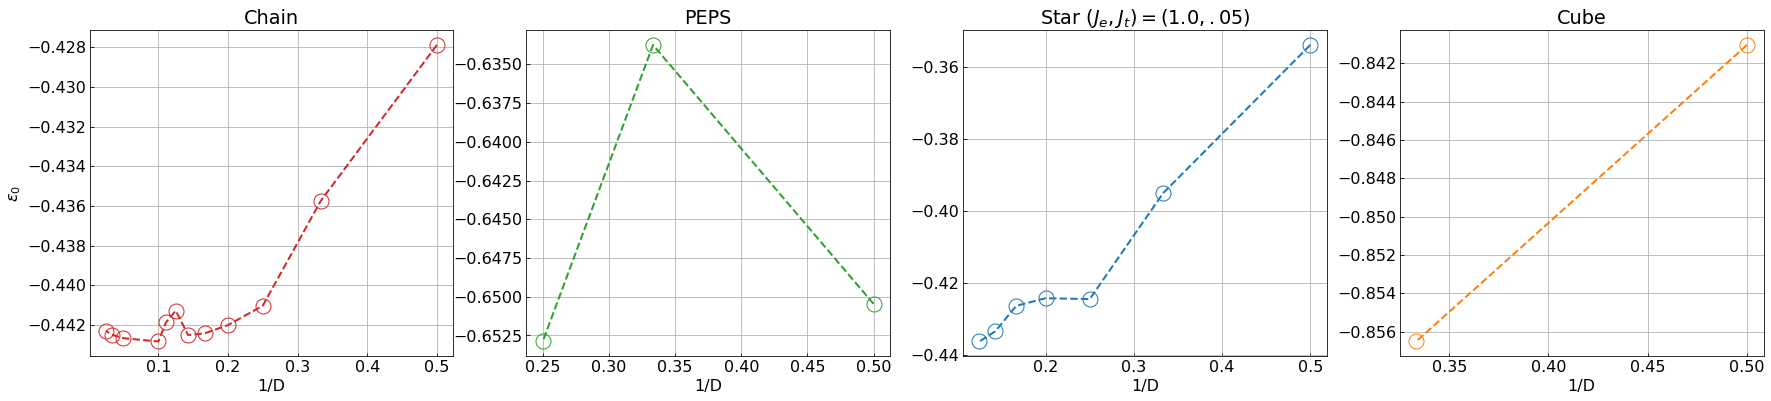

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(30, 6))
axes[0].plot(1 / np.array(d_max_chain), chain_energy, '--o', color='tab:red', markerfacecolor='none', linewidth=2, markersize=15)
axes[0].set_xlabel(r'1/D')
axes[0].set_ylabel(r'$\epsilon_0$')
axes[0].set_title('Chain')
axes[0].tick_params(direction='in', axis='both')
axes[0].grid()

axes[1].plot(1 / np.array(d_max_peps), peps_energy, '--o', color='tab:green', markerfacecolor='none', linewidth=2, markersize=15)
axes[1].set_xlabel(r'1/D')
#axes[1].set_ylabel(r'$\epsilon_0$')
axes[1].set_title('PEPS')
axes[1].tick_params(direction='in', axis='both')
axes[1].grid()

axes[2].plot(1 / np.array(d_max_star), star_energy, '--o', color='tab:blue', markerfacecolor='none', linewidth=2, markersize=15)
axes[2].set_xlabel(r'1/D')
#axes[2].set_ylabel(r'$\epsilon_0$')
axes[2].set_title(r'Star $\left(J_e,J_t\right)=\left(1.0,.05\right)$')
axes[2].tick_params(direction='in', axis='both')
axes[2].grid()

axes[3].plot(1 / np.array(d_max_cube), cube_energy, '--o', color='tab:orange', markerfacecolor='none', linewidth=2, markersize=15)
axes[3].set_xlabel(r'1/D')
#axes[3].set_ylabel(r'$\epsilon_0$')
axes[3].set_title('Cube')
axes[3].tick_params(direction='in', axis='both')
axes[3].grid()
